In [1]:
# Import libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import mse, rmse

# Edit pandas display option to show more rows and columns:
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Read csv file
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv"))

# Print out the first 5 rows of the dataset
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.000,6,3.000,3.000,10.000,5.000,8.000,5.000,4.000,2.000,60.000,1.000
1,CH,25.000,6,6.000,5.000,7.000,5.000,9.000,3.000,2.000,2.000,59.000,1.000
2,CH,26.000,6,1.000,8.000,8.000,8.000,7.000,6.000,3.000,1.000,24.000,2.000
3,CH,28.000,6,4.000,6.000,6.000,7.000,10.000,6.000,2.000,2.000,64.000,1.000
4,CH,29.000,6,5.000,6.000,7.000,5.000,8.000,7.000,2.000,2.000,55.000,1.000


In [3]:
# Inspect column datatype and missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 873.0+ KB


In [4]:
# % of missing value per column
null = df.isnull().sum()/len(df)
null[null>0]

tvtot     0.001
ppltrst   0.002
pplfair   0.005
pplhlp    0.003
happy     0.004
sclmeet   0.002
sclact    0.011
gndr      0.001
agea      0.028
partner   0.002
dtype: float64

In [5]:
# Since the amount of missing values is minimal, we'll drop all records with missing value
df = df.dropna(axis=0)

In [6]:
# Double check to see if there's any missing value left
null = df.isnull().sum()/len(df)
null[null>0]

Series([], dtype: float64)

In [7]:
# Statistically inspect the dataset:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8147.000,8147.000,8147.000,8147.000,8147.000,8147.000,8147.000,8147.000,8147.000,8147.000,8147.000,8147.000
mean,40226.219,6.500,3.819,5.575,6.005,5.321,7.708,5.216,2.756,1.496,47.262,1.385
std,632072.110,0.500,2.009,2.216,2.120,2.166,1.721,1.439,0.901,0.500,18.317,0.487
min,1.000,6.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,15.000,1.000
25%,1063.000,6.000,2.000,4.000,5.000,4.000,7.000,4.000,2.000,1.000,33.000,1.000
50%,1749.000,7.000,4.000,6.000,6.000,5.000,8.000,6.000,3.000,1.000,47.000,1.000
75%,2778.000,7.000,5.000,7.000,8.000,7.000,9.000,6.000,3.000,2.000,61.000,2.000
max,11001431.000,7.000,7.000,10.000,10.000,10.000,10.000,7.000,5.000,2.000,114.000,2.000


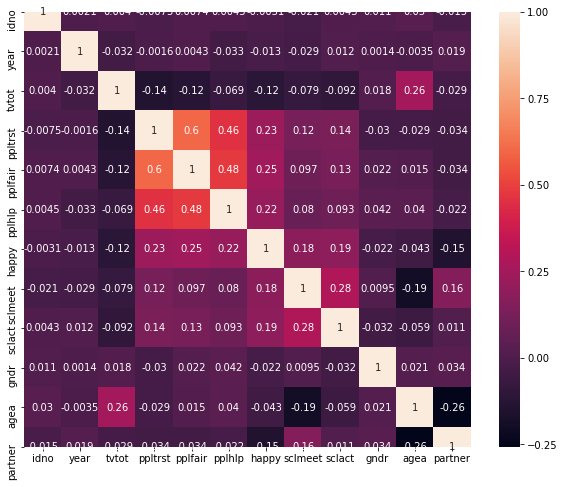

In [8]:
# Plot the correlation matrix:
corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

In [9]:
# # Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry'])]

# Print out the shape of the outcome and predictors:
print(y.shape)
print(X.shape)

(8147,)
(8147, 11)


In [10]:
# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

print(X.shape)

(8147, 17)


In [11]:
# Split the data into training and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6110, 17)
(2037, 17)
(6110,)
(2037,)


In [12]:
# We'll make 1000 iterations, use 4-deep trees, and set our loss function.
params = {'n_estimators': 1000,
          'max_depth': 4,
          'loss': 'exponential', 
          'learning_rate': 0.05, 
          'subsample': 0.7}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print('Root mean squared error of the prediction is: {:.3f} \n'.format(rmse(y_test, predict_test)))

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0,1] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1,0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0,1]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1,0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))



Root mean squared error of the prediction is: 0.493 

Training set accuracy:
Percent Type I errors: 0.018166939443535188
Percent Type II errors: 0.0955810147299509

Test set accuracy:
Percent Type I errors: 0.07461953853706431
Percent Type II errors: 0.16887579774177713


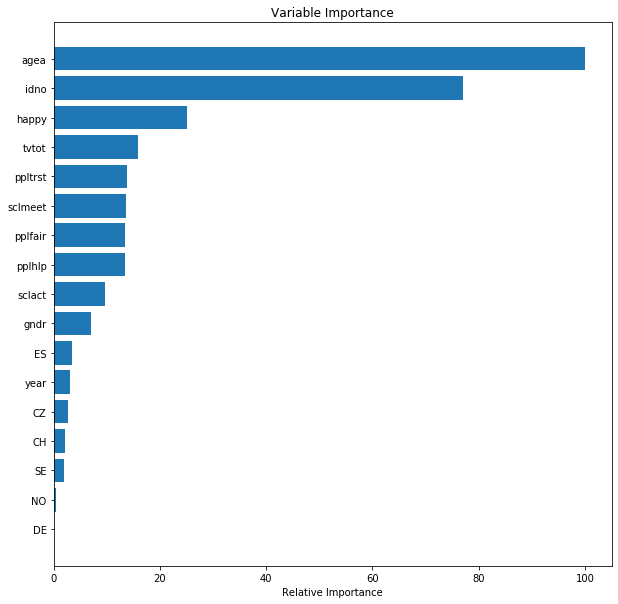

In [15]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
plt.figure(figsize=(10,10))
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()